# Using the OpenAI API (GPT-4o Multimodal)

- Author: [Erika](https://github.com/ErikaPark)
- Design:
- Peer Review: [Wooseok Jeong](https://github.com/jeong-wooseok), [JeongGi Park](https://github.com/jeongkpa)
- This is a part of [LangChain Open Tutorial](https://github.com/LangChain-OpenTutorial/LangChain-OpenTutorial)

[![Open in Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/langchain-ai/langchain-academy/blob/main/module-4/sub-graph.ipynb) [![Open in LangChain Academy](https://cdn.prod.website-files.com/65b8cd72835ceeacd4449a53/66e9eba12c7b7688aa3dbb5e_LCA-badge-green.svg)](https://academy.langchain.com/courses/take/intro-to-langgraph/lessons/58239937-lesson-2-sub-graphs)

## Overview

This tutorial explores how to effectively utilize OpenAI's GPT-4o multimodal model in conjunction with LangChain, a powerful framework for building language model applications. Users will learn how to configure and interact with the `ChatOpenAI` object to perform tasks such as generating responses, analyzing model predictions, and utilizing advanced features like real-time response streaming and token log probability inspection. This guide provides the tools needed to experiment with and deploy advanced AI solutions efficiently and seamlessly.

### Table of Contents

- [Overview](#overview)
- [Environment Setup](#environment-setup)
- [ChatOpenAI GPT-4o Multimodal](#using-the-openai-api-gpt-4o-multimodal)
- [Multimodal AI: Text and Image Processing with GPT-4o](#multimodal-ai-text-and-image-processing-with-gpt-4o)
- [Configuring Multimodal AI with System and User Prompts](#configuring-multimodal-ai-with-system-and-user-prompts)


### References

[OpenAI Model Overview](https://platform.openai.com/docs/models)

----

## Environment Setup

Set up the environment. You may refer to [Environment Setup](https://wikidocs.net/257836) for more details.

**[Note]**
- `langchain-opentutorial` is a package that provides a set of easy-to-use environment setup, useful functions and utilities for tutorials. 
- You can checkout the [`langchain-opentutorial`](https://github.com/LangChain-OpenTutorial/langchain-opentutorial-pypi) for more details.

In [1]:
%%capture --no-stderr
!pip install langchain-opentutorial

In [2]:
# Install required packages
from langchain_opentutorial import package

package.install(
    [
        "langchain",
        "langchain_openai",
    ],
    verbose=False,
    upgrade=False,
)

In [3]:
from dotenv import load_dotenv

load_dotenv(override=True)


True

In [4]:
# Set environment variables
from langchain_opentutorial import set_env

set_env(
    {
        # "OPENAI_API_KEY": "",
        # "LANGCHAIN_API_KEY": "",
        "LANGCHAIN_TRACING_V2": "true",
        "LANGCHAIN_ENDPOINT": "https://api.smith.langchain.com",
        "LANGCHAIN_PROJECT": "Using-OpenAI-API",  
    }
)

Environment variables have been set successfully.


## ChatOpenAI GPT-4o Multimodal

This is a chat-specific Large Language Model (LLM) provided by OpenAI.

When creating an object, the following options can be specified. Details about the options are as follows:

`temperature`

- Specifies the sampling temperature, which can be chosen between 0 and 2. A higher value, such as 0.8, results in more random outputs, while a lower value, such as 0.2, makes the outputs more focused and deterministic.

`max_tokens`

- The maximum number of tokens to generate for the chat completion.

`model_name` : List of available models
- `gpt-4o`
- `gpt-4o-mini`
- `o1-preview`, `o1-preview-mini` : Available only for Tier 5 accounts, which require a minimum recharge of $1,000 to access.

![gpt-models.png](./assets/04-using-openai-api-gpt4o-get-models.png)

- Link: https://platform.openai.com/docs/models



In [5]:
from langchain_openai.chat_models import ChatOpenAI

# Create the ChatOpenAI object
llm = ChatOpenAI(
    temperature=0.1,  # Creativity (range: 0.0 ~ 2.0)
    model_name="gpt-4o-mini",  # Model name
)

question = "What is the capital of South Korea?"

print(f"[Answer]: {llm.invoke(question)}")


[Answer]: content='The capital of South Korea is Seoul.' additional_kwargs={'refusal': None} response_metadata={'token_usage': {'completion_tokens': 9, 'prompt_tokens': 15, 'total_tokens': 24, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4o-mini-2024-07-18', 'system_fingerprint': 'fp_0aa8d3e20b', 'finish_reason': 'stop', 'logprobs': None} id='run-969a6359-97b6-446f-b4c1-73f13abad8ef-0' usage_metadata={'input_tokens': 15, 'output_tokens': 9, 'total_tokens': 24, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'output_token_details': {'audio': 0, 'reasoning': 0}}


### Response Format (AI Message)
When using the `ChatOpenAI` object, the response is returned in the format of an AI Message. This includes the text content generated by the model along with any metadata or additional properties associated with the response. These provide structured information about the AI's reply and how it was generated.

**Key Components of AI Message**
1. **`content`**  
   - **Definition:** The primary response text generated by the AI.  
   - **Example:** `"The capital of South Korea is Seoul."`  
   - **Purpose:** This is the main part of the response that users interact with.

2. **`response_metadata`**  
   - **Definition:** Metadata about the response generation process.  
   - **Key Fields:**
     - **`model_name` :** Name of the model used (e.g., `"gpt-4o-mini"` ).
     - **`finish_reason` :** Reason the generation stopped (`"stop"` for normal completion).
     - **`token_usage` :** Token usage details:
       - **`prompt_tokens` :** Tokens used for the input query.
       - **`completion_tokens` :** Tokens used for the response.
       - **`total_tokens` :** Combined token count.

3. **`id`**  
   - **Definition:** A unique identifier for the API call.  
   - **Purpose:** Useful for tracking or debugging specific interactions.

In [6]:
# Query content
question = "What is the capital of South Korea?"

# Query
response = llm.invoke(question)

In [7]:
response

AIMessage(content='The capital of South Korea is Seoul.', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 9, 'prompt_tokens': 15, 'total_tokens': 24, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4o-mini-2024-07-18', 'system_fingerprint': 'fp_0aa8d3e20b', 'finish_reason': 'stop', 'logprobs': None}, id='run-9b339231-7917-49bb-b6d1-aeaaf4629d2a-0', usage_metadata={'input_tokens': 15, 'output_tokens': 9, 'total_tokens': 24, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'output_token_details': {'audio': 0, 'reasoning': 0}})

In [8]:
# Extract key components
content = response.content  # AI's response text
model_name = response.response_metadata['model_name']
total_tokens = response.response_metadata['token_usage']['total_tokens']

# Print results
print(f"Response: {content}")
print(f"Model: {model_name}")
print(f"Total Tokens Used: {total_tokens}")

Response: The capital of South Korea is Seoul.
Model: gpt-4o-mini-2024-07-18
Total Tokens Used: 24


### Activating `LogProb`

`LogProb` represents the **logarithmic probabilities** assigned by the model to predicted tokens. A token is an individual unit of text, such as a word, character, or part of a word. The probability indicates the **model's confidence in predicting each token**.

**Use Cases**:
`LogProb` is useful for evaluating the model's prediction confidence, debugging issues, and optimizing prompts. By analyzing `LogProb` data, you can understand why the model selected specific tokens.

**Caution**:
Enabling `LogProb` increases the response data size, which may affect API speed and cost. It is recommended to activate it only when necessary.

In [9]:
# Object creation with LogProb enabled
llm_with_logprob = ChatOpenAI(
    temperature=0.1, 
    max_tokens=2048,  
    model_name="gpt-4o-mini" 
).bind(logprobs=True) # Activating LogProb to retrieve token-level probabilities


In [10]:
# Query content
question = "What is the capital of South Korea?"

# Query
response = llm_with_logprob.invoke(question)


In [11]:
# Display the response metadata
print(response.response_metadata)


{'token_usage': {'completion_tokens': 9, 'prompt_tokens': 15, 'total_tokens': 24, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4o-mini-2024-07-18', 'system_fingerprint': 'fp_0aa8d3e20b', 'finish_reason': 'stop', 'logprobs': {'content': [{'token': 'The', 'bytes': [84, 104, 101], 'logprob': 0.0, 'top_logprobs': []}, {'token': ' capital', 'bytes': [32, 99, 97, 112, 105, 116, 97, 108], 'logprob': 0.0, 'top_logprobs': []}, {'token': ' of', 'bytes': [32, 111, 102], 'logprob': 0.0, 'top_logprobs': []}, {'token': ' South', 'bytes': [32, 83, 111, 117, 116, 104], 'logprob': 0.0, 'top_logprobs': []}, {'token': ' Korea', 'bytes': [32, 75, 111, 114, 101, 97], 'logprob': 0.0, 'top_logprobs': []}, {'token': ' is', 'bytes': [32, 105, 115], 'logprob': 0.0, 'top_logprobs': []}, {'token': ' Seoul', 'bytes': [32, 83, 101, 111, 1

### Streaming Output

The streaming option is particularly useful for receiving real-time responses to queries.

Instead of waiting for the entire response to be generated, the model streams the output token by token or in chunks, enabling faster interaction and immediate feedback.

In [12]:
# Streaming query
answer = llm.stream("Please provide 10 beautiful tourist destinations in South Korea along with their addresses!")


In [13]:
# Streaming real-time output
for token in answer:
    print(token.content, end="", flush=True)


Sure! Here are 10 beautiful tourist destinations in South Korea along with their addresses:

1. **Gyeongbokgung Palace**
   - Address: 161 Sajik-ro, Sejongno, Jongno-gu, Seoul, South Korea

2. **Namsan Tower (N Seoul Tower)**
   - Address: 105 Namsangongwon-gil, Yongsan-gu, Seoul, South Korea

3. **Jeju Island**
   - Address: Jeju Special Self-Governing Province, South Korea

4. **Bukchon Hanok Village**
   - Address: 37, Gyedong-gil, Jongno-gu, Seoul, South Korea

5. **Seoraksan National Park**
   - Address: 1730 Seoraksan-ro, Sokcho-si, Gangwon-do, South Korea

6. **Changdeokgung Palace and Secret Garden**
   - Address: 99 Yulgok-ro, Jongno-gu, Seoul, South Korea

7. **Busan Haeundae Beach**
   - Address: Haeundae Beach, Haeundae-gu, Busan, South Korea

8. **Gyeongju Historic Areas**
   - Address: 1, Hwangnam-dong, Gyeongju-si, Gyeongsangbuk-do, South Korea

9. **Incheon Songdo Central Park**
   - Address: 1-1 Songdo-dong, Yeonsu-gu, Incheon, South Korea

10. **Nami Island**
    - Ad

In [14]:
answer = llm.stream("Provide 10 beautiful tourist destinations in South Korea along with their addresses!")

# Streaming real-time output
for token in answer:
    print(token.content, end="", flush=True)



Sure! Here are 10 beautiful tourist destinations in South Korea along with their addresses:

1. **Gyeongbokgung Palace**
   - Address: 161 Sajik-ro, Sejongno, Jongno-gu, Seoul, South Korea

2. **Namsan Tower (N Seoul Tower)**
   - Address: 105 Namsangongwon-gil, Yongsan-gu, Seoul, South Korea

3. **Jeju Island**
   - Address: Jeju Special Self-Governing Province, South Korea (Note: Jeju Island is a large area; specific attractions can be found within it.)

4. **Bukchon Hanok Village**
   - Address: 37, Gyedong-gil, Jongno-gu, Seoul, South Korea

5. **Seoraksan National Park**
   - Address: 1730 Seoraksan-ro, Sokcho-si, Gangwon-do, South Korea

6. **Changdeokgung Palace and Huwon (Secret Garden)**
   - Address: 99 Yulgok-ro, Jongno-gu, Seoul, South Korea

7. **Busan Haeundae Beach**
   - Address: Haeundae Beach, Haeundae-gu, Busan, South Korea

8. **Gyeongju Historic Areas**
   - Address: 1, Hwangnam-dong, Gyeongju-si, Gyeongsangbuk-do, South Korea (Note: Gyeongju is a city with multipl

## Multimodal AI: Text and Image Processing with GPT-4o

Multimodal refers to technologies or approaches that integrate and process multiple types of information (modalities). This includes a variety of data types such as:

- Text: Information in written form, such as documents, books, or web pages.
- Image: Visual information, including photos, graphics, or illustrations.
- Audio: Auditory information, such as speech, music, or sound effects.
- Video: A combination of visual and auditory information, including video clips or real-time streaming.

`gpt-4o` and `gpt-4-turbo` support vision capabilities, enabling them to process and understand images alongside text inputs. In this tutorial, we’ll explore how to process images and analyze them using GPT-4o.

### Step 1. Setting up ChatOpenAI

First, create a `ChatOpenAI` object with the `gpt-4o` model and streaming capabilities enabled.

In [15]:
# Create the ChatOpenAI object
llm = ChatOpenAI(
    temperature=0.1,
    model_name="gpt-4o",
    streaming=True  # Enable streaming for real-time output
)


### Step 2. Encoding Images
Images need to be encoded into **Base64** format for the model to process them. The following function handles both URL-based and local image files:

In [16]:
import requests
import base64
import mimetypes
from IPython.display import display, HTML, Image

def encode_image(image_path_or_url):
    if image_path_or_url.startswith("http://") or image_path_or_url.startswith("https://"):
        # Download image from URL
        response = requests.get(image_path_or_url)
        if response.status_code == 200:
            image_content = response.content
        else:
            raise Exception(f"Failed to download image: {response.status_code}")
        # Guess MIME type based on URL
        mime_type, _ = mimetypes.guess_type(image_path_or_url)
        if mime_type is None:
            mime_type = "application/octet-stream"  # Default MIME type for unknown files
    else:
        # Read image from local file
        try:
            with open(image_path_or_url, "rb") as image_file:
                image_content = image_file.read()
            # Guess MIME type based on file extension
            mime_type, _ = mimetypes.guess_type(image_path_or_url)
            if mime_type is None:
                mime_type = "application/octet-stream"  # Default MIME type for unknown files
        except FileNotFoundError:
            raise Exception(f"File not found: {image_path_or_url}")

    # Base64 encode the image
    return f"data:{mime_type};base64,{base64.b64encode(image_content).decode()}"


**Example: Encode and Display an Image** 

* URL-based Image:


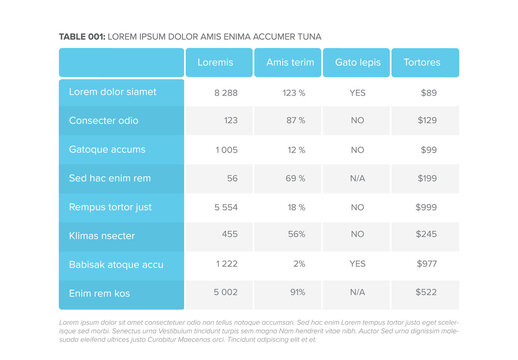

In [17]:
IMAGE_URL = "https://t3.ftcdn.net/jpg/03/77/33/96/360_F_377339633_Rtv9I77sSmSNcev8bEcnVxTHrXB4nRJ5.jpg"
encoded_image_url = encode_image(IMAGE_URL)
display(Image(url=encoded_image_url)) # Display the image

* Local Image:


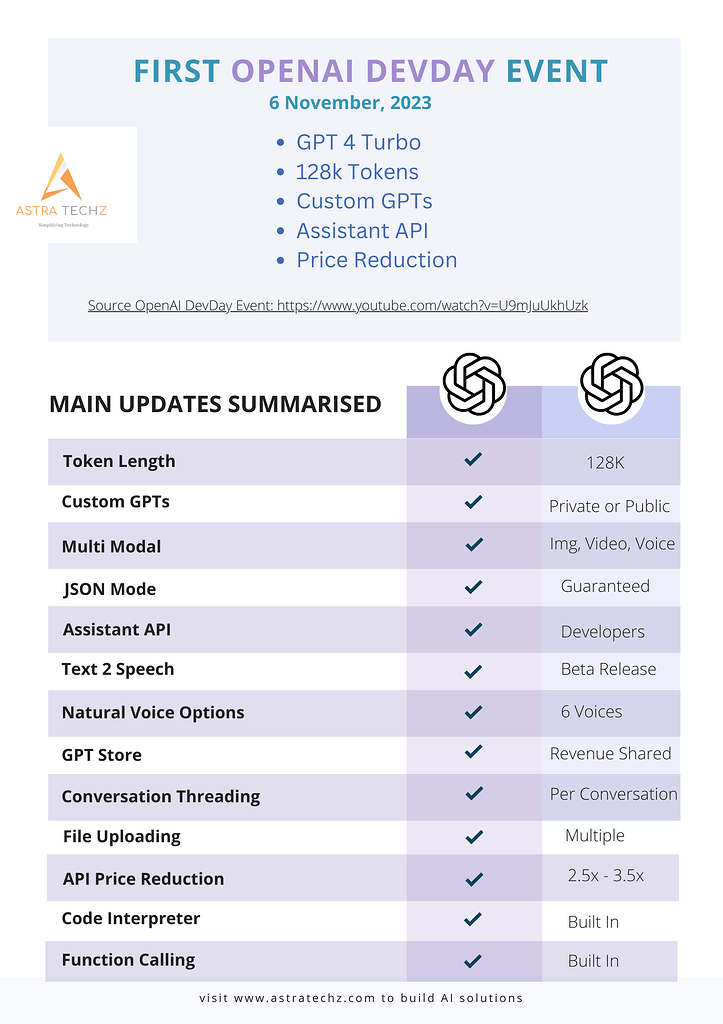

In [19]:
IMAGE_PATH = "./assets/04-using-openai-api-gpt4o-sample-image.png"
encoded_image_file = encode_image(IMAGE_PATH)
html_code = f'<img src="{encoded_image_file}" alt="Image" style="max-width: 100%; height: auto;">'
display(HTML(html_code))  # Display the image

### Step 3: Creating Messages
Define a function to generate the messages required for the model. This includes:

- **System Prompt**: Defines the role and task for the AI.
- **User Prompt**: Provides the specific task instructions.
- **Encoded Image**: Includes the Base64 image data.

In [20]:
# Function to create messages for the AI
def create_messages(encoded_image):
    system_prompt = "You are a helpful assistant on parsing images."
    user_prompt = "Explain the given images in-depth."
    return [
        {"role": "system", "content": system_prompt},
        {
            "role": "user",
            "content": [
                {"type": "text", "text": user_prompt},
                {"type": "image_url", "image_url": {"url": encoded_image}},
            ],
        },
    ]

### Step 4: Model Interaction
Now, send the generated messages to the model and stream the results in real time.

In [21]:
def stream_response(llm, messages):
    response = llm.stream(messages)  # Stream AI response
    print("Streaming response:")
    for chunk in response:
        print(chunk.content, end="", flush=True)  # Print each response chunk in real time

In [22]:
# Display the image
display(Image(url=IMAGE_URL))
encoded_image_url = encode_image(IMAGE_URL)

#  Create messages and stream responses
messages_url = create_messages(encoded_image_url)
stream_response(llm, messages_url)



Streaming response:
The image is a table labeled "TABLE 001: LOREM IPSUM DOLOR AMIS ENIMA ACCUMER TUNA." It contains eight rows and five columns, with the following details:

### Columns:
1. **First Column (No Header):** Contains placeholder text phrases.
2. **Loremis:** Numerical values.
3. **Amis terim:** Percentage values.
4. **Gáto lepis:** Contains "YES," "NO," or "N/A."
5. **Tortores:** Monetary values in dollars.

### Rows:
1. **Lorem dolor siamet:** 
   - Loremis: 8,288
   - Amis terim: 123%
   - Gáto lepis: YES
   - Tortores: $89

2. **Consecter odio:** 
   - Loremis: 123
   - Amis terim: 87%
   - Gáto lepis: NO
   - Tortores: $129

3. **Gatoque accums:** 
   - Loremis: 1,005
   - Amis terim: 12%
   - Gáto lepis: NO
   - Tortores: $199

4. **Sed hac enim rem:** 
   - Loremis: 56
   - Amis terim: 69%
   - Gáto lepis: N/A
   - Tortores: $199

5. **Rempus tortor just:** 
   - Loremis: 5,554
   - Amis terim: 18%
   - Gáto lepis: YES
   - Tortores: $999

6. **Klimas nsecter:** 
   


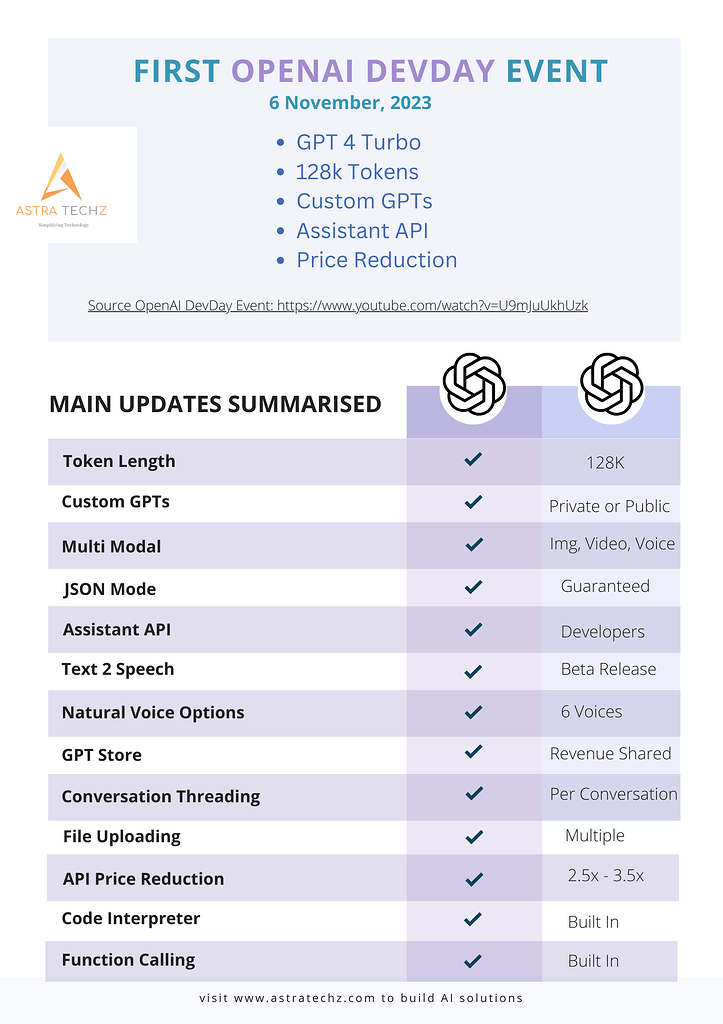

Streaming response:
The image is an announcement poster for the "First OpenAI DevDay Event" scheduled for November 6, 2023. It highlights several key updates and features related to OpenAI's offerings. Here's a detailed breakdown:

### Event Details
- **Title:** First OpenAI DevDay Event
- **Date:** November 6, 2023
- **Source:** A YouTube link is provided for more information.

### Key Announcements
- **GPT 4 Turbo:** A new version of the GPT model.
- **128k Tokens:** Increased token limit for processing larger inputs.
- **Custom GPTs:** Ability to create personalized GPT models.
- **Assistant API:** New API for developers.
- **Price Reduction:** Lower costs for using OpenAI services.

### Main Updates Summarized
- **Token Length:** Increased to 128K.
- **Custom GPTs:** Available as private or public.
- **Multi Modal:** Supports image, video, and voice inputs.
- **JSON Mode:** Guaranteed support for JSON.
- **Assistant API:** Available for developers.
- **Text to Speech:** Beta releas

In [23]:
# 1. Encoding image
IMAGE_PATH = "./assets/04-using-openai-api-gpt4o-sample-image.png"
encoded_image_file = encode_image(IMAGE_PATH)
html_code = f'<img src="{encoded_image_file}" alt="Image" style="max-width: 100%; height: auto;">'
display(HTML(html_code))

# 2. Create messages and stream responses
messages_file = create_messages(encoded_image_file)
stream_response(llm, messages_file)

## Configuring Multimodal AI with System and User Prompts
This tutorial demonstrates how to configure a multimodal AI using **system prompts** and **user prompts**, and how to process and interpret an image-based financial table.


### What Are Prompts? 

**System Prompt**
Defines the AI's identity, responsibilities, and behavior for the session:

* Sets the AI's context, ensuring consistent responses.
* Example: "You are a financial assistant specializing in interpreting tables."

**User Prompt**
Gives task-specific instructions to guide the AI:

* Specifies what the user expects the AI to do.
* Example: "Analyze this financial table and summarize the insights."

### Step 1: Set Up the ChatOpenAI Object
The `ChatOpenAI` object initializes the model with the desired configurations, such as temperature and model type.

In [24]:
# Create the ChatOpenAI object
llm = ChatOpenAI(
    temperature=0.1, 
    model_name="gpt-4o",  
    streaming=True
)

### Step2: Encode and Display the Image
Images need to be encoded into Base64 format so the AI can process them. 


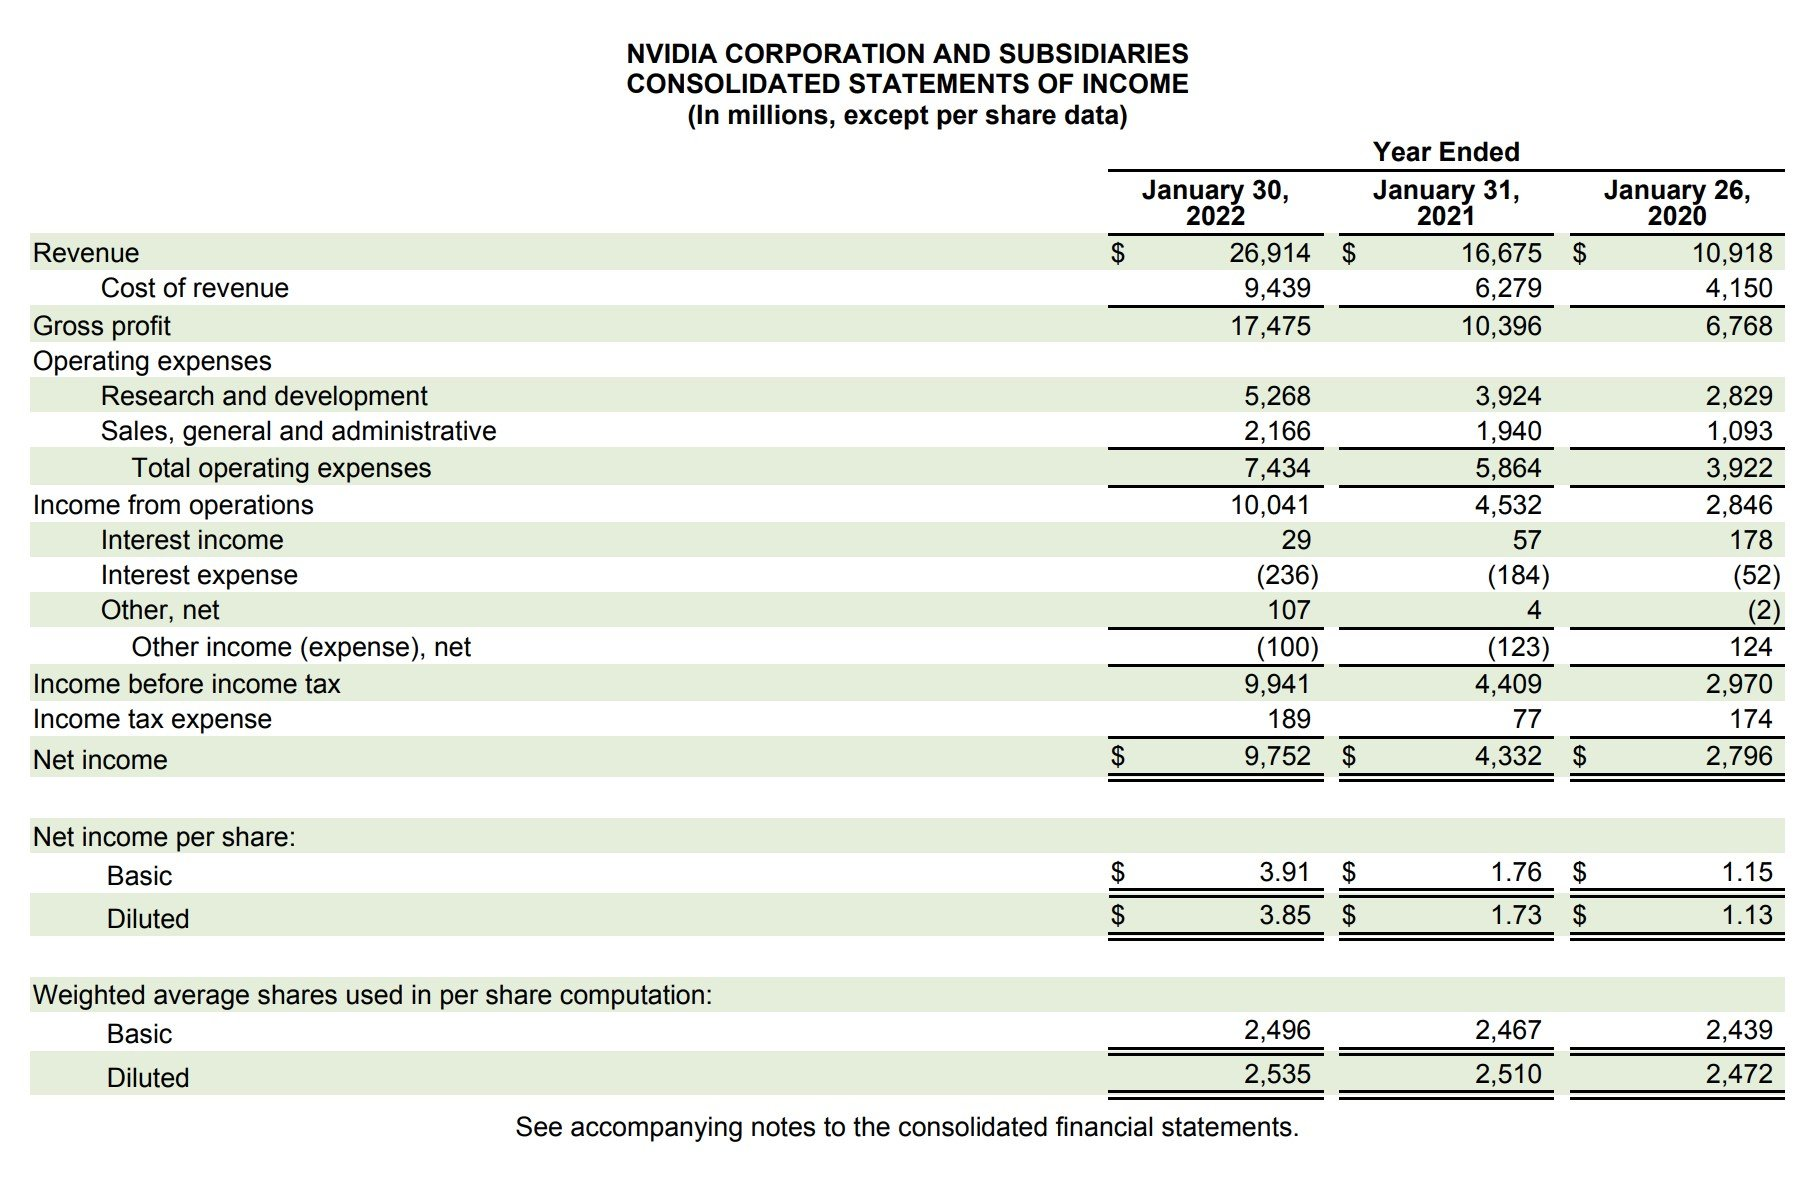

In [25]:

IMAGE_URL = "https://media.wallstreetprep.com/uploads/2022/05/24100154/NVIDIA-Income-Statement.jpg?_gl=1*zqx63z*_gcl_au*MTI3Njg2MTE3Mi4xNzM1NDg1OTky*_ga*Mjg1MjY3NTAzLjE3MzU0ODU5OTI.*_ga_0X18K5P59L*MTczNTQ4NTk5MS4xLjAuMTczNTQ4NTk5MS42MC4wLjE1OTkyODA0MTI."

encoded_image_url = encode_image(IMAGE_URL) 
display(Image(url=encoded_image_url)) # Display the original image.

### Step 3: Define System and User Prompts
Set up the prompts to guide the AI’s behavior and task execution.


In [26]:
# System prompt: Describe the AI's role and responsibilities
system_prompt = """You are a financial AI assistant specializing in interpreting tables (financial statements).
Your mission is to analyze the provided table-format financial statements and summarize interesting insights in a friendly and clear manner."""

# User prompt: Provide instructions for the task
user_prompt = """The table provided to you represents a company's financial statements. Summarize the interesting insights from the table."""

### Step 4: Create Messages for the AI
Combine the system prompt, user prompt, and the encoded image into a structured message format.

In [27]:
messages = [
    {"role": "system", "content": system_prompt},
    {
        "role": "user",
        "content": [
            {"type": "text", "text": user_prompt},
            {"type": "image_url", "image_url": {"url": encoded_image_url}},
        ],
    },
]

### Step 5: Stream the AI's Response
Use the AI model to process the messages and stream the results in real time.

In [28]:
def stream_response(llm, messages):
    response = llm.stream(messages)  # Stream AI response
    print("Streaming response:")
    for chunk in response:
        print(chunk.content, end="", flush=True)  # Print each response chunk in real time

# Execute streaming
stream_response(llm, messages)


Streaming response:
Here are some interesting insights from NVIDIA's financial statements:

1. **Revenue Growth**: The company has shown significant revenue growth over the three years. Revenue increased from $10,918 million in 2020 to $26,914 million in 2022, more than doubling in this period.

2. **Gross Profit Increase**: Gross profit also saw a substantial rise, from $6,768 million in 2020 to $17,475 million in 2022. This indicates effective management of cost of revenue, which increased at a slower rate than revenue.

3. **Operating Expenses**: Operating expenses have increased, particularly in research and development, which rose from $2,829 million in 2020 to $5,268 million in 2022. This suggests a strong focus on innovation and product development.

4. **Net Income Surge**: Net income has more than tripled from $2,796 million in 2020 to $9,752 million in 2022, reflecting improved profitability.

5. **Earnings Per Share (EPS)**: Both basic and diluted EPS have increased signific